In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
import progressbar
import os
from os import listdir

## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.4.0
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Apr 14 2021 11:29:48CEST



## Load of the data

In [68]:
from process import loaddata
class_data0 = loaddata("../data/{}.csv".format('low_ene'))

In [69]:
class_data0 = class_data0[class_data0[:,0] > 0.001]

In [176]:
data = []
i = 0
for class_ in class_data0:
    if class_[0] > 0.12 and class_[0] < 0.25:
        for i in range(8000):
            data.append(class_) 
    if class_[0] > 0.065 and class_[0] < 0.1:
        for i in range(6000):
            data.append(class_) 
    if class_[0] > 0.25 and class_[0] < 0.35:
        for i in range(6000):
            data.append(class_) 
    if class_[0] > 0.4:
        for i in range(10000):
            data.append(class_) 
    else: 
        data.append(class_) 

In [177]:
len(data)
class_data = []
class_data = np.array(data)

In [178]:
class_data.shape

(3961529, 14)

In [179]:
class_data0.shape

(531585, 14)

In [180]:
np.random.shuffle(class_data)
y = class_data[:,0]
A = class_data
print(A[0])
A[:,9] = A[:,13]
print(A[0])
x = class_data[:,1:10]
print(x[0])
print(x.shape)

[ 1.22770357e-01  2.38940846e-01 -1.90164224e-01 -1.17584399e-01
 -1.33386558e-01 -7.88039621e-02  2.03525669e-01  4.43200000e+07
  4.46400000e+07  2.00000000e-01  2.00000000e-01  0.00000000e+00
  4.00000000e-01  9.71498363e-06]
[ 1.22770357e-01  2.38940846e-01 -1.90164224e-01 -1.17584399e-01
 -1.33386558e-01 -7.88039621e-02  2.03525669e-01  4.43200000e+07
  4.46400000e+07  9.71498363e-06  2.00000000e-01  0.00000000e+00
  4.00000000e-01  9.71498363e-06]
[ 2.38940846e-01 -1.90164224e-01 -1.17584399e-01 -1.33386558e-01
 -7.88039621e-02  2.03525669e-01  4.43200000e+07  4.46400000e+07
  9.71498363e-06]
(3961529, 9)


## Check to see if the data are balanced now

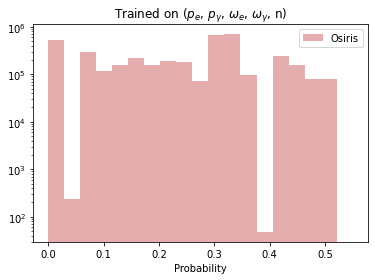

In [186]:
from matplotlib import pyplot
y = np.array(y)
bins = np.linspace(0, 0.55, 20)
pyplot.hist(y, bins, color = 'indianred', alpha=0.5, label='Osiris')
#pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()

In [187]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 2971146 
Valuation sample: 990383


In [188]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [189]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

In [190]:
def build_model() :
    model = models.Sequential()
    model.add (BatchNormalization(input_dim = 9))
    model.add (layers.Dense (12 , activation = "sigmoid"))
    model.add (layers.Dense (9 , activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = 'mae' , metrics = ["mape"])
    return model

In [207]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 100000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_noposition2.h5".format('probability'))

Epoch 1/1000
30/30 [==============================] - 1s 23ms/step - loss: 0.1729 - mape: 3602.3710 - val_loss: 0.1503 - val_mape: 3180.2134
Epoch 2/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.1246 - mape: 2827.7451 - val_loss: 0.1208 - val_mape: 2607.5073
Epoch 3/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.1077 - mape: 2282.8119 - val_loss: 0.1130 - val_mape: 2405.4766
Epoch 4/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.1021 - mape: 2104.9098 - val_loss: 0.1058 - val_mape: 2192.2456
Epoch 5/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0996 - mape: 1967.0806 - val_loss: 0.1011 - val_mape: 1994.2059
Epoch 6/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0972 - mape: 1838.9409 - val_loss: 0.0973 - val_mape: 1803.5790
Epoch 7/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0945 - mape: 1691.7016 - val_loss: 0.0938 - val_mape: 1618.8070
Epoch 8/1000


30/30 [==============================] - 0s 17ms/step - loss: 0.0486 - mape: 110.2243 - val_loss: 0.0483 - val_mape: 108.1225
Epoch 60/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0486 - mape: 107.6011 - val_loss: 0.0484 - val_mape: 105.6846
Epoch 61/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0484 - mape: 106.1735 - val_loss: 0.0478 - val_mape: 105.1097
Epoch 62/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0481 - mape: 103.8393 - val_loss: 0.0479 - val_mape: 101.4244
Epoch 63/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0478 - mape: 101.8307 - val_loss: 0.0477 - val_mape: 99.9311
Epoch 64/1000
30/30 [==============================] - 0s 16ms/step - loss: 0.0476 - mape: 99.8239 - val_loss: 0.0475 - val_mape: 97.6663
Epoch 65/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0477 - mape: 98.6222 - val_loss: 0.0469 - val_mape: 97.1800
Epoch 66/1000
30/30 [==================

30/30 [==============================] - 1s 20ms/step - loss: 0.0338 - mape: 57.3532 - val_loss: 0.0327 - val_mape: 55.9413
Epoch 119/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0345 - mape: 57.0918 - val_loss: 0.0324 - val_mape: 55.8026
Epoch 120/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0337 - mape: 56.4648 - val_loss: 0.0331 - val_mape: 56.9529
Epoch 121/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0338 - mape: 56.4003 - val_loss: 0.0325 - val_mape: 55.2050
Epoch 122/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0342 - mape: 55.9332 - val_loss: 0.0323 - val_mape: 54.5343
Epoch 123/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0347 - mape: 56.2837 - val_loss: 0.0325 - val_mape: 54.7508
Epoch 124/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0337 - mape: 56.0422 - val_loss: 0.0317 - val_mape: 54.0859
Epoch 125/1000
30/30 [====================

30/30 [==============================] - 1s 20ms/step - loss: 0.0280 - mape: 43.9908 - val_loss: 0.0262 - val_mape: 42.9153
Epoch 178/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0279 - mape: 43.5739 - val_loss: 0.0263 - val_mape: 42.9659
Epoch 179/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0275 - mape: 43.7085 - val_loss: 0.0267 - val_mape: 43.1481
Epoch 180/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0283 - mape: 43.8081 - val_loss: 0.0260 - val_mape: 42.5537
Epoch 181/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.0284 - mape: 43.7640 - val_loss: 0.0270 - val_mape: 42.6201
Epoch 182/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0286 - mape: 43.7394 - val_loss: 0.0265 - val_mape: 42.2335
Epoch 183/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0280 - mape: 43.1954 - val_loss: 0.0271 - val_mape: 41.6818
Epoch 184/1000
30/30 [====================

30/30 [==============================] - 1s 20ms/step - loss: 0.0248 - mape: 39.1056 - val_loss: 0.0220 - val_mape: 36.9595
Epoch 237/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0232 - mape: 38.0835 - val_loss: 0.0218 - val_mape: 37.3120
Epoch 238/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0239 - mape: 38.6604 - val_loss: 0.0213 - val_mape: 37.0210
Epoch 239/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0256 - mape: 39.0470 - val_loss: 0.0236 - val_mape: 37.8046
Epoch 240/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0244 - mape: 38.6916 - val_loss: 0.0220 - val_mape: 37.4715
Epoch 241/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0236 - mape: 38.3215 - val_loss: 0.0213 - val_mape: 37.0149
Epoch 242/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0232 - mape: 38.0589 - val_loss: 0.0219 - val_mape: 37.6493
Epoch 243/1000
30/30 [====================

30/30 [==============================] - 1s 20ms/step - loss: 0.0212 - mape: 33.8492 - val_loss: 0.0183 - val_mape: 32.1833
Epoch 296/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0208 - mape: 33.9610 - val_loss: 0.0178 - val_mape: 32.2246
Epoch 297/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0209 - mape: 33.5970 - val_loss: 0.0185 - val_mape: 32.5052
Epoch 298/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0212 - mape: 33.5808 - val_loss: 0.0179 - val_mape: 31.9294
Epoch 299/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0209 - mape: 33.6324 - val_loss: 0.0186 - val_mape: 32.1204
Epoch 300/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0203 - mape: 33.5204 - val_loss: 0.0182 - val_mape: 31.7729
Epoch 301/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0203 - mape: 33.4049 - val_loss: 0.0195 - val_mape: 32.8416
Epoch 302/1000
30/30 [====================

30/30 [==============================] - 1s 19ms/step - loss: 0.0190 - mape: 30.5088 - val_loss: 0.0164 - val_mape: 29.5358
Epoch 355/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0180 - mape: 30.2627 - val_loss: 0.0164 - val_mape: 28.9270
Epoch 356/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0184 - mape: 30.0974 - val_loss: 0.0160 - val_mape: 28.9820
Epoch 357/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0184 - mape: 30.1934 - val_loss: 0.0155 - val_mape: 28.6423
Epoch 358/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0183 - mape: 30.1144 - val_loss: 0.0155 - val_mape: 28.4420
Epoch 359/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0182 - mape: 30.2193 - val_loss: 0.0166 - val_mape: 28.9841
Epoch 360/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0174 - mape: 29.8483 - val_loss: 0.0153 - val_mape: 28.2393
Epoch 361/1000
30/30 [====================

30/30 [==============================] - 1s 20ms/step - loss: 0.0172 - mape: 28.3228 - val_loss: 0.0150 - val_mape: 26.7773
Epoch 414/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0183 - mape: 28.9912 - val_loss: 0.0145 - val_mape: 26.5883
Epoch 415/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0172 - mape: 28.6449 - val_loss: 0.0143 - val_mape: 26.3939
Epoch 416/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0166 - mape: 27.9387 - val_loss: 0.0140 - val_mape: 26.7197
Epoch 417/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0176 - mape: 28.8532 - val_loss: 0.0139 - val_mape: 26.6507
Epoch 418/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0167 - mape: 28.0559 - val_loss: 0.0140 - val_mape: 26.6410
Epoch 419/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0176 - mape: 28.6664 - val_loss: 0.0145 - val_mape: 26.7976
Epoch 420/1000
30/30 [====================

30/30 [==============================] - 1s 19ms/step - loss: 0.0157 - mape: 27.0650 - val_loss: 0.0149 - val_mape: 26.5471
Epoch 473/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0178 - mape: 27.8629 - val_loss: 0.0133 - val_mape: 25.8559
Epoch 474/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0167 - mape: 27.6669 - val_loss: 0.0130 - val_mape: 25.2799
Epoch 475/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.0160 - mape: 26.9694 - val_loss: 0.0134 - val_mape: 25.8894
Epoch 476/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0161 - mape: 27.2834 - val_loss: 0.0132 - val_mape: 25.6981
Epoch 477/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0166 - mape: 27.5392 - val_loss: 0.0132 - val_mape: 25.3935
Epoch 478/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0156 - mape: 26.9352 - val_loss: 0.0128 - val_mape: 25.3892
Epoch 479/1000
30/30 [====================

30/30 [==============================] - 1s 19ms/step - loss: 0.0166 - mape: 27.5356 - val_loss: 0.0142 - val_mape: 25.8652
Epoch 532/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0171 - mape: 27.6272 - val_loss: 0.0122 - val_mape: 25.0283
Epoch 533/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0151 - mape: 26.6488 - val_loss: 0.0137 - val_mape: 25.1891
Epoch 534/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0156 - mape: 26.8088 - val_loss: 0.0130 - val_mape: 25.3785
Epoch 535/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0157 - mape: 26.6484 - val_loss: 0.0130 - val_mape: 25.0781
Epoch 536/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0156 - mape: 26.7763 - val_loss: 0.0153 - val_mape: 26.7617
Epoch 537/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0166 - mape: 27.5672 - val_loss: 0.0131 - val_mape: 25.5041
Epoch 538/1000
30/30 [====================

30/30 [==============================] - 1s 18ms/step - loss: 0.0146 - mape: 26.8038 - val_loss: 0.0119 - val_mape: 25.4247
Epoch 591/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0134 - mape: 26.1318 - val_loss: 0.0112 - val_mape: 24.9469
Epoch 592/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0150 - mape: 26.6134 - val_loss: 0.0115 - val_mape: 24.8879
Epoch 593/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0134 - mape: 26.0585 - val_loss: 0.0119 - val_mape: 25.1700
Epoch 594/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0141 - mape: 26.6685 - val_loss: 0.0126 - val_mape: 25.1735
Epoch 595/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0150 - mape: 26.5602 - val_loss: 0.0119 - val_mape: 25.0013
Epoch 596/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0146 - mape: 26.3758 - val_loss: 0.0114 - val_mape: 24.9166
Epoch 597/1000
30/30 [====================

30/30 [==============================] - 1s 18ms/step - loss: 0.0146 - mape: 27.0526 - val_loss: 0.0107 - val_mape: 25.0371
Epoch 650/1000
30/30 [==============================] - 1s 17ms/step - loss: 0.0134 - mape: 26.6080 - val_loss: 0.0114 - val_mape: 25.2595
Epoch 651/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0149 - mape: 27.3591 - val_loss: 0.0114 - val_mape: 25.1936
Epoch 652/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0133 - mape: 26.7568 - val_loss: 0.0114 - val_mape: 25.3818
Epoch 653/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0133 - mape: 26.5400 - val_loss: 0.0109 - val_mape: 25.1223
Epoch 654/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0138 - mape: 27.1038 - val_loss: 0.0108 - val_mape: 25.2322
Epoch 655/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0142 - mape: 27.3804 - val_loss: 0.0109 - val_mape: 25.0720
Epoch 656/1000
30/30 [====================

30/30 [==============================] - 1s 19ms/step - loss: 0.0136 - mape: 27.1072 - val_loss: 0.0112 - val_mape: 25.3555
Epoch 709/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0135 - mape: 26.8769 - val_loss: 0.0097 - val_mape: 25.1054
Epoch 710/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0124 - mape: 26.4747 - val_loss: 0.0095 - val_mape: 24.8120
Epoch 711/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0128 - mape: 26.6274 - val_loss: 0.0093 - val_mape: 24.7072
Epoch 712/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0120 - mape: 26.4561 - val_loss: 0.0098 - val_mape: 24.9663
Epoch 713/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0130 - mape: 26.6611 - val_loss: 0.0098 - val_mape: 24.9235
Epoch 714/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0126 - mape: 26.5465 - val_loss: 0.0097 - val_mape: 25.0779
Epoch 715/1000
30/30 [====================

30/30 [==============================] - 1s 19ms/step - loss: 0.0106 - mape: 26.2995 - val_loss: 0.0087 - val_mape: 24.9080
Epoch 768/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0113 - mape: 26.4424 - val_loss: 0.0098 - val_mape: 25.4979
Epoch 769/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0118 - mape: 26.9879 - val_loss: 0.0086 - val_mape: 24.7921
Epoch 770/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0105 - mape: 25.8138 - val_loss: 0.0093 - val_mape: 25.0204
Epoch 771/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0116 - mape: 26.4589 - val_loss: 0.0087 - val_mape: 24.9780
Epoch 772/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0122 - mape: 27.0383 - val_loss: 0.0108 - val_mape: 25.4718
Epoch 773/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0112 - mape: 26.7561 - val_loss: 0.0085 - val_mape: 24.8412
Epoch 774/1000
30/30 [====================

30/30 [==============================] - 1s 20ms/step - loss: 0.0124 - mape: 27.0291 - val_loss: 0.0083 - val_mape: 25.3364
Epoch 827/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0107 - mape: 26.5219 - val_loss: 0.0081 - val_mape: 25.2735
Epoch 828/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0127 - mape: 27.7933 - val_loss: 0.0091 - val_mape: 25.5649
Epoch 829/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0105 - mape: 27.1031 - val_loss: 0.0077 - val_mape: 25.1537
Epoch 830/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0099 - mape: 26.1852 - val_loss: 0.0077 - val_mape: 25.1606
Epoch 831/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0112 - mape: 27.0146 - val_loss: 0.0086 - val_mape: 25.3464
Epoch 832/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0101 - mape: 26.6569 - val_loss: 0.0081 - val_mape: 25.3413
Epoch 833/1000
30/30 [====================

Epoch 885/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0105 - mape: 27.2862 - val_loss: 0.0080 - val_mape: 26.1804
Epoch 886/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0107 - mape: 27.1614 - val_loss: 0.0075 - val_mape: 25.8070
Epoch 887/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0106 - mape: 27.6170 - val_loss: 0.0077 - val_mape: 25.9220
Epoch 888/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0097 - mape: 26.9672 - val_loss: 0.0078 - val_mape: 25.8249
Epoch 889/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0100 - mape: 26.9226 - val_loss: 0.0074 - val_mape: 25.9186
Epoch 890/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0101 - mape: 27.6723 - val_loss: 0.0076 - val_mape: 26.1628
Epoch 891/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0095 - mape: 26.9627 - val_loss: 0.0077 - val_mape: 25.7986
Epoch 892/1000
30/30 [=====

Epoch 944/1000
30/30 [==============================] - 1s 19ms/step - loss: 0.0095 - mape: 27.9330 - val_loss: 0.0064 - val_mape: 25.8083
Epoch 945/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0097 - mape: 27.8955 - val_loss: 0.0081 - val_mape: 26.6584
Epoch 946/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0105 - mape: 27.8270 - val_loss: 0.0073 - val_mape: 25.9694
Epoch 947/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0095 - mape: 27.3122 - val_loss: 0.0065 - val_mape: 25.9235
Epoch 948/1000
30/30 [==============================] - 1s 21ms/step - loss: 0.0095 - mape: 27.3824 - val_loss: 0.0066 - val_mape: 26.1049
Epoch 949/1000
30/30 [==============================] - 1s 18ms/step - loss: 0.0093 - mape: 27.5009 - val_loss: 0.0064 - val_mape: 25.9922
Epoch 950/1000
30/30 [==============================] - 1s 20ms/step - loss: 0.0092 - mape: 27.3664 - val_loss: 0.0076 - val_mape: 26.4947
Epoch 951/1000
30/30 [=====

In [208]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 9)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 10        
Total params: 283
Trainable params: 265
Non-trainable params: 18
_________________________________________________________________


<ipython-input-209-d79fc1320319>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


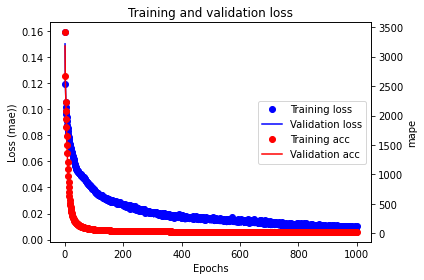

In [209]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['mape']
val_accuracy = history.history['val_mape']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (mae))')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('mape')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
#fig.savefig("acc+loss_drop.pdf")
fig.show()

## Probability density distribution

In [210]:
y0 = class_data0[:,0]
A0 = class_data0
A0[:,9] = A0[:,13]
x0 = class_data0[:,1:10]

In [211]:
y_pred = model.predict(x0)

In [212]:
y_pred

array([[1.4703298e-01],
       [2.4521917e-02],
       [4.0993071e-01],
       ...,
       [1.5673188e-06],
       [1.4640987e-03],
       [3.9883053e-06]], dtype=float32)

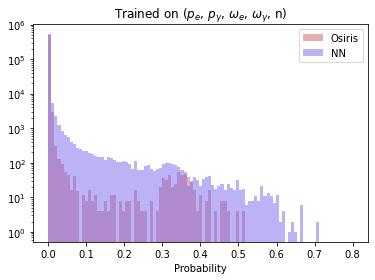

In [213]:
from matplotlib import pyplot
y = np.array(y)
bins = np.linspace(0, 0.8, 100)
pyplot.hist(y0, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()